In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv=datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\abhee\scikit_learn_data


In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv.data.shape    #4096 pixels of each image as they are flattened into single array

(400, 4096)

In [6]:
oliv.images.shape  #each image is 64 * 64

(400, 64, 64)

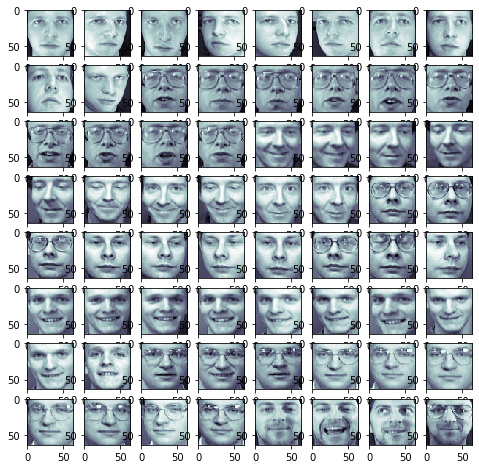

In [10]:
fig=plt.figure(figsize=(8,8))
#im just plotting the first 64 images instead of whole 400 image dataset just for simplicity

for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [11]:
# first 10 images are of the same person and next 10 of different person and so on
#basically this dataset has 40 different people with 10 different images each
#NOW  , we want to apply PCA on these images . Remember for PCA data has to be in form of 2-D aray 
# so use olive.data now cuz its 2-d array

In [12]:
x=oliv.data
y=oliv.target

In [13]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.00419107, -0.00710951, -0.00933611, ...,  0.0001852 ,
         0.0033797 ,  0.0031883 ],
       [-0.02859129, -0.03328847, -0.03784652, ...,  0.0296278 ,
         0.02721296,  0.02488896],
       [ 0.001357  , -0.00032574, -0.00019798, ..., -0.01541373,
        -0.01370986, -0.01188348],
       ...,
       [ 0.00223487,  0.02056668,  0.01515898, ..., -0.0127356 ,
        -0.0584897 , -0.07650319],
       [ 0.01714702,  0.02917732, -0.0094248 , ...,  0.00159091,
         0.01249347, -0.00815246],
       [-0.0033299 ,  0.01062728,  0.01483784, ..., -0.01175934,
        -0.01631041, -0.00565946]], dtype=float32)

In [16]:
# the default value of no.of components to take is min(400,4096) which is conuter-intuitive to when we apply pca on
#small dimensional data such as (400,13) .Here PCA will create 13 components of size 13 which can be represented in
#the original feature space.... BUT thats how things work here :)

In [17]:
# here the shape of PCA matrix will be ( 400 ,4096) ..and the number of components are 400 with 4096 size each
pca.components_.shape

(400, 4096)

In [20]:
#how many components we want to keep
k = 0
total = 0
while total <.95:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k

123

In [24]:
pca=PCA(n_components=k,whiten=True)       #whiten is kind of feature scaling as we reduce the new components to
transformed_data=pca.fit_transform(x)     # zero mean and zero variance
transformed_data.shape

(400, 123)

In [22]:
#each image has 123 dimensions ..We reduced the dimensionality from 4096 to 123 with maintaining 95 % variance

In [27]:
x_approx=pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [28]:
# we have to reshape the data to plot it

In [30]:
x_approx_images=x_approx.reshape((400,64,64))

In [31]:
x_approx_images.shape

(400, 64, 64)

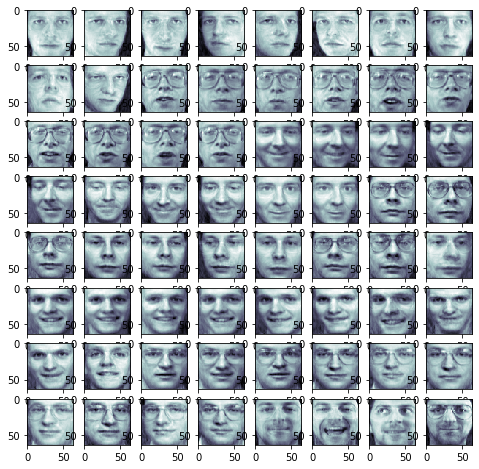

In [32]:
fig=plt.figure(figsize=(8,8))
#im just plotting the first 64 images instead of whole 400 image dataset just for simplicity

for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [33]:
#quite recognizable right ? see the power of pca ...with 123 components instead of 4096 , we dont see any 
#major difference between the two sets of images

In [34]:
# now talking about a important concept called eigen faces

In [36]:
eigen_vectors=pca.components_
eigen_vectors.shape

(123, 4096)

In [38]:
eigen_faces=eigen_vectors.reshape((123,64,64))

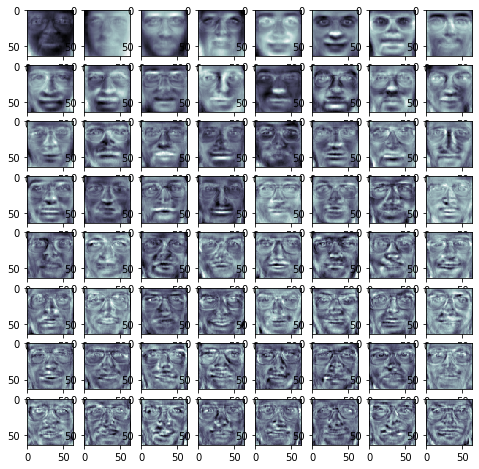

In [39]:
fig=plt.figure(figsize=(8,8))
#im just plotting the first 64 images instead of whole 400 image dataset just for simplicity

for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigen_faces[i],cmap=plt.cm.bone)
plt.show()

In [40]:
# this tells us that each new component that we have in pca matrix represents some distinct feature of an image